In [1]:
#!pip install nbimporter
#import nbimporter
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample


%run Fonctions_projet.ipynb

#Download data

#maybe better to export data from introduction before

#df of log returns
df_5m=pd.read_parquet("data/clean/5m/data_clean_5m_log_ret.parquet")



In [2]:
#Rolling clustering for 5m dataset


#Cluster tickers

#Compute T=3*N
N = df_5m.shape[1]
T = N // 3

#Number of windows possible
lag_max = df_5m.shape[0] - T
liste = RolledCluster(df_5m, T, "louvain_cluster/date/5m", True, False, lag_max)

In [ ]:
liste_cluster=dask.compute(dask.compute(liste))[0][0]
#liste_cluster

In [4]:
number_of_clusters=[]
for element in liste_cluster:
    number_of_clusters.append(element["Cluster"].unique().max()+1)

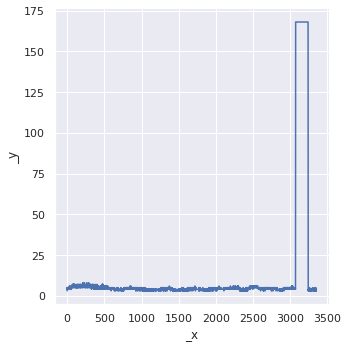

In [5]:
sns.set()
sns.relplot(data=number_of_clusters,kind="line")

0.5430207709259192

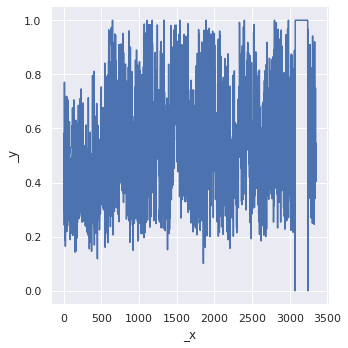

In [6]:
ARI= RolledARI(liste_cluster)
sns.set()
sns.relplot(data=ARI, kind="line")
np.mean(ARI)

In [7]:
for i in range(0,len(liste_cluster)-1):
    if len(liste_cluster[i].value_counts())==len(liste_cluster[i+1].value_counts()):
        liste_cluster[i+1]=keep_cluster_number(liste_cluster[i],liste_cluster[i+1])

ZeroDivisionError: division by zero